- 7 카메라 스티커앱 만들기 첫걸음

<<목차>>

1) 데이터 준비
    - 패키지 준비
    - 이미지 읽어오기
    - cvtColor()

    
2) face detection
    - dlib의 'face detector'는 HOG(Histogram of Oriented Gradients)와 SVM(Support Vector Machine)으로 detect
    - HOG detector로 bounding box 추출

    
3) face landmark
    - Object keypoint estimation

    - Dlib landmark localization

4) 스티커 적용
    - 스티커를 적용할 위치 좌표
    - 사진의 형태에 따른 스티커 조정
    - 다듬어주기(crop)
    - sticker area

    
5) 후처리


6) 다양한 시도
   
    
7) 루브릭 항목


8) 회고

1) 데이터 준비

In [1]:
#패키지 준비
    
import os # 환경 변수나 디렉터리, 파일 등의 OS 자원을 제어할 수 있게 해주는 모듈
import cv2 # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import matplotlib.pyplot as plt # 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
import numpy as np # 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 하는 라이브러리
import dlib # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리 

print(cv2.__version__)
print(dlib.__version__)

4.6.0
19.24.0


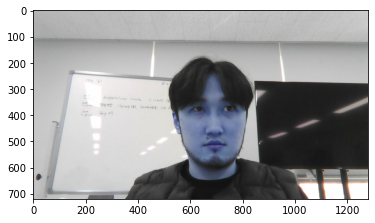

In [2]:
#이미지 읽어오기

my_image_path = '/home/june/2022-10-07.jpg' # 본인 이미지가 있는 경로를 가지고 온다
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러온다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관한다
plt.imshow(img_bgr) # 이미지를 출력하기 위해 출력할 이미지를 올려준다
plt.show() # 이미지를 출력

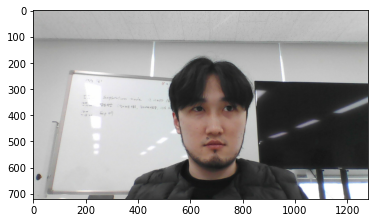

In [3]:
# cvtCorlor() 메소드로 BGR을 RGB로 바꾸기 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) # 이미지 실제 출력하기 위해 이미지를 올려줌
plt.show() # 이미지 실제 출력

2) face detection

In [4]:
# dlib의 'face detector'는 HOG(Histogram of Oriented Gradients)와 SVM(Support Vector Machine)으로 얼굴 detect

detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) #dlib은 rgb 이미지를 입력으로 받기 때문에 cvtColor() 를 이용해서 opencv 의 bgr 이미지를 rgb로 변환
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

rectangles[[(557, 320) (825, 587)]]


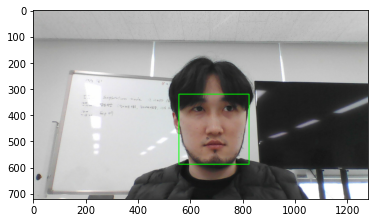

In [5]:
#HOG detector로 bounding box 추출

print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

3) face landmark

In [6]:
# Object keypoint estimation : 
# Face landmark와 같이 객체 내부의 점을 찾는 기술을 object keypoint estimation이라 부르고 크게 2가지로 나뉨
#    1. top-down : bounding box를 찾고 box 내부의 keypoint를 예측
#    2. bottom-up : 이미지 전체의 keypoint를 먼저 찾고 point 관계를 이용해 군집화 해서 box 생성

model_path = '/home/june/shape_predictor_68_face_landmarks.dat'
    # 저장한 landmark 모델의 주소를 model_path 변수에 저장
landmark_predictor = dlib.shape_predictor(model_path)
    # dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
    # landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
    # dlib.rectangle: 내부를 예측하는 박스
    # dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄

In [7]:
#Dlib landmark localization

list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성    

# 얼굴 영역 박스 마다 face landmark를 찾아냄
# face landmark 좌표를 저장
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list 
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

68


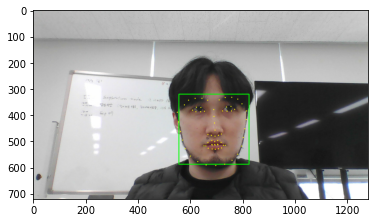

In [8]:
#랜드마크 로칼라이제이션 출력

# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # RGB 이미지로 전환
plt.imshow(img_show_rgb)
    # 이미지를 준비
plt.show()
    # 이미지를 출력

4) 스티커 적용

In [9]:
# 스티커를 적용할 위치 좌표

print(dlib_rect)
# → rectangles[[(557, 320) (825, 587)]]

print(list_landmarks)
# [[0(551, 389),  1(555, 426),  2(563, 462),  3(571, 495),  4(581, 528),  5(601, 556),  6(629, 577),  7(661, 590),  8(698, 592),  9(732, 587),
#  10(760, 572), 11(782, 549), 12(797, 518), 13(803, 485), 14(809, 452), 15(815, 417), 16(816, 384), 17(578, 361), 18(594, 343), 19(619, 336),
#   (645, 336), (667, 343), (711, 342), (734, 333), (759, 332), (782, 339), (798, 357), (690, 379), (691, 405), (693, 430), 
#   (695, 457), (668, 474), (681, 477), (695, 480), (708, 477), (719, 472), (609, 381), (624, 370), (641, 371), (655, 385), 
#   (640, 387), (622, 387), (724, 384), (739, 369), (756, 367), (770, 378), (758, 384), (741, 385), (653, 517), (668, 505), 
#   (683, 497), (694, 501), (705, 497), (718, 504), (734, 515), (720, 525), (708, 528), (696, 530), (684, 529), (669, 526), 
#   (660, 517), (683, 512), (694, 512), (705, 511), (727, 515), (706, 513), (695, 514), (684, 514)]]


for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[30]) # 코의 index는 30(695, 457) 입니다
    x = landmark[30][0] # 이미지에서 코 부위의 x값
    y = landmark[30][1] + dlib_rect.height()//2  # 이미지에서 코 부위의 y값
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

[(557, 320) (825, 587)]
[[(551, 389), (555, 426), (563, 462), (571, 495), (581, 528), (601, 556), (629, 577), (661, 590), (698, 592), (732, 587), (760, 572), (782, 549), (797, 518), (803, 485), (809, 452), (815, 417), (816, 384), (578, 361), (594, 343), (619, 336), (645, 336), (667, 343), (711, 342), (734, 333), (759, 332), (782, 339), (798, 357), (690, 379), (691, 405), (693, 430), (695, 457), (668, 474), (681, 477), (695, 480), (708, 477), (719, 472), (609, 381), (624, 370), (641, 371), (655, 385), (640, 387), (622, 387), (724, 384), (739, 369), (756, 367), (770, 378), (758, 384), (741, 385), (653, 517), (668, 505), (683, 497), (694, 501), (705, 497), (718, 504), (734, 515), (720, 525), (708, 528), (696, 530), (684, 529), (669, 526), (660, 517), (683, 512), (694, 512), (705, 511), (727, 515), (706, 513), (695, 514), (684, 514)]]
(695, 457)
(x,y) : (695,591)
(w,h) : (269,269)


# zip() : 두 그룹의 데이터를 서로 엮어주는 파이썬의 내장 함수
# dlib_rects와 list_landmarks 데이터를 엮어 주었음
# dlib_rects : 얼굴 영역을 저장하고 있는 값

In [10]:
#사진의 형태에 따른 스티커 조정

sticker_path = '/home/june/24674.png' # 스티커 이미지의 경로
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(187) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
print (img_sticker.shape) # 사이즈를 조정한 스티커 이미지의 차원 확인

(269, 269, 3)


In [11]:
# x,y,w,h 모두 위에서 반복문 안에서 지정해준 값임
# x는 이미지에서 코 부위의 x값 = 695
# y는 이미지에서 코 부위의 y값 = 457
# w는 얼굴 영역의 가로를 차지하는 픽셀의 수 = 269
# h는 얼굴 영역의 가로를 차지하는 픽셀의 수 = 269
refined_x = x - w // 2 # 695 - (269//2) = 695-134 = 561
refined_y = y - h # 457-269 = 188
# 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정합니다. 이미지 시작점은 top-left 좌표이기 때문입니다.
# 즉, refined_x, refined_y값에서 이미지가 시작됨
print ('(x,y) : (%d,%d)'%(refined_x, refined_y)) 

(x,y) : (561,322)


In [12]:
#다듬어주기(crop)

# 스티커 이미지가 이미지 밖에서 시작하지 않도록 조정이 필요함
# 좌표 순서가 y,x임에 유의한다. (y,x,rgb channel)
# 현재 상황에서는 -y 크기만큼 스티커를 crop 하고, top 의 x좌표와 y 좌표를 각각의 경우에 맞춰 원본 이미지의 경계 값으로 수정하면 아래와 같은 형식으로 나옵니다.
# 음수값 만큼 스티커 이미지(혹은 추후 적용할 스티커 이미지)를 자른다.
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
# 스티커 이미지를 씌우기 위해 스티커 이미지가 시작할 y좌표 값 조정
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :] # refined_y가 양수이므로, (187, 187, 3)에서 아무것도 잘려나가지 않음.
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (561,322)


In [13]:
#sticker area

# 좌표 순서가 y,x임에 유의한다. (y,x,rgb channel)
# img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# 스티커 이미지에서 사용할 부분은 0이 아닌 색이 있는 부분을 사용합니다.
# 스티커 이미지에서 0이 나오는 부분은 흰색이라는 뜻, 즉 이미지가 없다는 소리임.
# 그렇기 때문에 0인 부분(이미지가 없는 부분)은 제외하고 적용
# sticker_area는 원본 이미지에서 스티커를 적용할 위치를 미리 잘라낸 이미지입니다.
# np.where는 조건에 해당하는 인덱스만 찾아서 값을 적용하는 방법이다.
# 아래 코드에서는 img_sticker가 0일 경우(스티커 이미지에서 스티커 부분 제외한 나머지 이미지)에는 sticker_area(원본 이미지에서 스티커를 적용할 위치를 미리 잘라낸 이미지)를 적용하고,
# 나머지 부분은 img_sticker(스티커 이미지)를 적용한다.
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

스티커의 투명 배경의 흰색으로 나오고 검은색의 수염부분이 자꾸 투명색으로 나와 어떻게 해결해야하는지 나름대로 고민해보고 찾아보아야 했다. 동료의 도움으로 알게된것인데,

np.where(img_sticker==0에서 0을 255로 바꿔줘야했다.

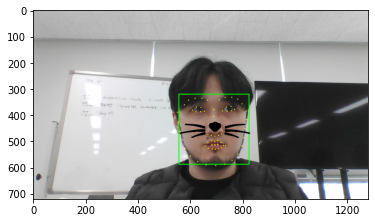

In [14]:
# 스티커 이미지를 적용한 이미지를 보여준다.
# 얼굴 영역(7-3)과 랜드마크(7-4)를 미리 적용해놓은 img_show에 스티커 이미지를 덧붙인 이미지가 나오게 된다.)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

5) 후처리

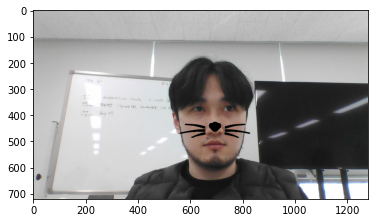

In [15]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_bgr은 7-2에서 rgb로만 적용해놓은 원본 이미지이다. 
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 스티커 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.show()

6) 다양한 시도


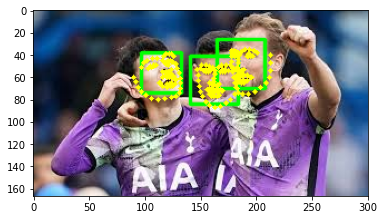

In [40]:
my_image_path = '/home/june/asdf.jpeg' 
img_bgr = cv2.imread(my_image_path)   
img_show = img_bgr.copy()  
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
detector_hog = dlib.get_frontal_face_detector() 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) 
dlib_rects = detector_hog(img_rgb, 1)  

for dlib_rect in dlib_rects: 
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right() 
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

model_path = '/home/june/shape_predictor_68_face_landmarks.dat'

landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
      
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))

    list_landmarks.append(list_points)
      
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)


img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
   
plt.imshow(img_show_rgb)
 
plt.show()

In [41]:
print(dlib_rect)

print(list_landmarks)


for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30])
    x = landmark[30][0]
    y = landmark[30][1] + dlib_rect.height()//2 
    w = h = dlib_rect.width() 
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

print (img_sticker.shape)

[(97, 38) (133, 74)]
[[(147, 53), (148, 58), (148, 63), (149, 68), (150, 73), (152, 77), (155, 82), (158, 85), (163, 87), (168, 86), (173, 83), (177, 80), (181, 75), (183, 70), (183, 65), (184, 59), (184, 54), (150, 52), (151, 49), (155, 49), (158, 50), (161, 51), (166, 51), (169, 49), (173, 49), (177, 49), (179, 52), (163, 54), (163, 57), (162, 61), (162, 64), (158, 65), (160, 66), (162, 67), (165, 67), (167, 66), (153, 54), (155, 53), (157, 53), (159, 54), (157, 55), (155, 55), (168, 55), (170, 53), (172, 53), (175, 54), (172, 55), (170, 55), (156, 71), (158, 70), (160, 70), (162, 71), (165, 70), (168, 71), (170, 72), (167, 76), (165, 77), (162, 77), (160, 77), (158, 75), (157, 71), (160, 71), (162, 72), (165, 72), (169, 72), (165, 73), (162, 74), (160, 73)], [(178, 41), (178, 46), (178, 50), (179, 55), (180, 60), (181, 65), (182, 69), (184, 74), (188, 75), (193, 75), (199, 73), (204, 69), (209, 65), (212, 60), (213, 54), (213, 47), (213, 40), (178, 38), (178, 36), (180, 36), (182, 3

In [42]:
sticker_path = '/home/june/24674.png' 
img_sticker = cv2.imread(sticker_path) 
img_sticker = cv2.resize(img_sticker, (w,h)) 

refined_x = x - w // 2
refined_y = y - h

if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0

if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0


    sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

ValueError: operands could not be broadcast together with shapes (37,37,3) (269,269,3) (37,37,3) 

다양한 각도에 일부는 가려진 얼굴이지만 랜드마크가 잘 생성됨을 볼수 있다.

문제는 스티커 붙이기 위해 기준점을 잡아야하는데 랜드마크가 많아 스티커가 붙여지지 않는다. 어떻게 붙여야할지는 아직 잘 모르겠다.

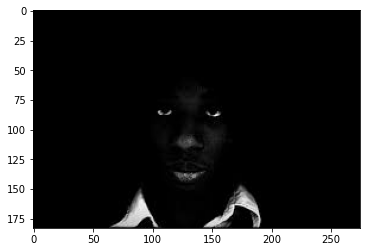

In [43]:
my_image_path = '/home/june/darkdark.jpeg' 
img_bgr = cv2.imread(my_image_path)   
img_show = img_bgr.copy()  
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
detector_hog = dlib.get_frontal_face_detector() 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) 
dlib_rects = detector_hog(img_rgb, 1)  

for dlib_rect in dlib_rects: 
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right() 
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

model_path = '/home/june/shape_predictor_68_face_landmarks.dat'

landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
      
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))

    list_landmarks.append(list_points)
      
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)


img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
  
plt.imshow(img_show_rgb)
  
plt.show()

적당히 어두운 사진, 즉 이목구비가 뚜렷하고 안면 윤곽또한 배경과 분리되어있다면 랜드마크가 잘잡히는 반면에 이 사진처럼 배경과 안면의 차이가 없다면 랜드마크를 잡지 못한다.

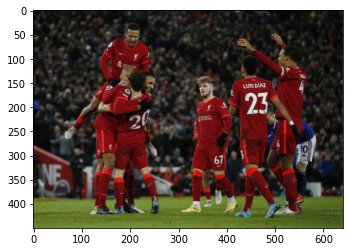

In [44]:
my_image_path = '/home/june/fdsa.jpeg' 
img_bgr = cv2.imread(my_image_path)   
img_show = img_bgr.copy()  
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
detector_hog = dlib.get_frontal_face_detector() 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) 
dlib_rects = detector_hog(img_rgb, 1)  

for dlib_rect in dlib_rects: 
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right() 
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

model_path = '/home/june/shape_predictor_68_face_landmarks.dat'

landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
      
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))

    list_landmarks.append(list_points)
      
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)


img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    
plt.imshow(img_show_rgb)
    
plt.show()

역시 랜드마크를 생성하기에 너무 까다로운 사진인것 같다. 적당히 멀고 얼굴이 적당히 구분이 잘 되어있다면 랜드마크를 잘 잡는 편인데 이 사진은 배경도 각도도 원근도 어느것하나 잡히기 쉽지 않은것 같다.

7) 루브릭 항목

1_ 자기만의 카메라앱 기능 구현을 완수하였다.
얼굴 영역과 랜드마크를 정확하게 검출하고, 스티커 사진을 합성시키는 데 성공하였다.

2_ 스티커 이미지를 정확한 원본 위치에 반영하였다.
정확한 좌표계산을 통해 고양이 수염의 위치가 원본 얼굴에 잘 어울리게 출력되었다.

3_ 카메라 스티커앱을 다양한 원본이미지에 적용했을 때의 문제점을 체계적으로 분석하였다.
얼굴각도, 이미지 밝기, 촬영거리 등 다양한 변수에 따른 영향도를 보고서에 체계적으로 분석하였다.

8) 회고

- 이번 프로젝트에서 **어려웠던 점,**

    CV쪽에 관심이 있어서 그런지 더욱더 관심이 가는 노드였다.  그래도 LMS를 쭈욱 따라가면 천천히 무난하게 진행이 되는 편인데 이번 노드에서는 몇가지 애로사항이 있었다. 

    첫번째는 스티커를 붙이는 기준점을 잡는게 코끝이라고 단순하게 생각하여 스티커를 붙였을 때 여전히 다른 위치에 가 있었고 스티커를 붙이는 위치인 y에 대하여 이해하는데 시간이 걸렸다.

    두번째는 스티커 이미지의 배경은 분명 투명인데 사진을 적용했을 때 흰색 바탕에 검은색의 고양이 수염은 투명이 되어버려서 문제를 해결하는데 도움이 필요했다. 바로 np.where() 메소드 안의 img_sticker 값을 255로 바꿔주는것.


- 프로젝트를 진행하면서 **알아낸 점** 혹은 **아직 모호한 점**

    얼굴 인식하는 방법에 HOG, SVM외에도 다양한 방법들이 존재한다는 점을 알게되었다. dlib_cnn, opencv_haar, mtcnn, mobilenet_ssd등.

    현업에서는 어떤 종류를 사용하고 어떤 문제에 어떤 모델이 어울리는지 등 궁금하지만 아직 갈 길이 멀다.


- 루브릭 평가 지표를 맞추기 위해 **시도한 것들**.

    스티커가 붙는 위치가 자꾸 엉뚱해서 붙일 위치를 스티커를 턱 끝 위치를 기준으로도 붙여보고 y값을 바꿔도 보았다.


- 만약에 루브릭 평가 관련 지표를 **달성 하지 못했을 때, 이유에 관한 추정**

    그저 이해도가 낮은 탓이리라....


- **자기 다짐**

    CV관련해서는 아직 다른 자료만큼 구글에 나와있는 것들이 많지 않다. 영어 원문을 읽을 수 있는 능력과 논문이나 자료를 잘 찾아내는 능력이 필요할 것 같다.